![example](images/director_shot.jpeg)

# Project Title

**Authors:** Student 1, Student 2, Student 3
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [33]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import keras
from tensorflow.keras.optimizers import SGD
from matplotlib.image import imread 
from PIL import Image

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers, optimizers, losses, metrics
from tensorflow.keras.layers import Dense, Dropout, Flatten
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report, recall_score, ConfusionMatrixDisplay
from sklearn.dummy import DummyClassifier

%matplotlib inline

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [2]:
train_path = '../data/chest_xray/train/' 
test_path = '../data/chest_xray/test/'

In [3]:
idg = ImageDataGenerator(rescale=1/255, validation_split = 0.20)

train_set = idg.flow_from_directory(train_path, target_size=(128, 128),
                                    color_mode='grayscale', class_mode='binary', subset='training')

validation_set = idg.flow_from_directory(train_path, target_size=(128, 128), 
                                         color_mode='grayscale', class_mode='binary', subset='validation')

test_set = idg.flow_from_directory(test_path, target_size=(128, 128), 
                                         color_mode='grayscale', class_mode='binary', shuffle=False)


Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [6]:
def evaluation(model):
    
    accuracy = model.score(test_set, test_set.classes)
    
    y_pred = model.predict(test_set)
    
    y_hat = 
                      
    ConfusionMatrixDisplay(confusion_matrix(test_set.classes, y_hat))

SyntaxError: invalid syntax (3125859297.py, line 3)

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

## Dummy Classifier

In [4]:
train_dummy = idg.flow_from_directory(train_path,
                                      target_size=(128, 128),
                                      color_mode='grayscale',
                                      class_mode='binary',
                                      subset='training', 
                                      batch_size=4173)

test_dummy = idg.flow_from_directory(test_path, 
                                         target_size=(128, 128),
                                         color_mode='grayscale',
                                         class_mode='binary',
                                         shuffle=False,
                                         batch_size=624)

train_images, train_labels = next(train_dummy)
test_images, test_labels = next(test_dummy)

Found 4173 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [5]:
baseline_model = DummyClassifier(strategy= 'most_frequent')
baseline_model.fit(train_images, train_labels)

DummyClassifier(strategy='most_frequent')

0.625
1.0


/Users/meiralelov/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


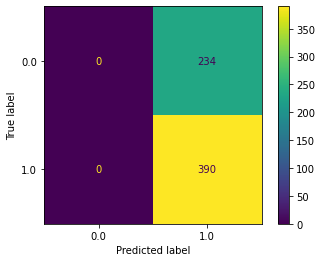

In [11]:
base_accuracy = baseline_model.score(test_images, test_labels)
print(base_accuracy)

y_base_pred = baseline_model.predict(test_images)

base_recall = recall_score(test_labels, y_base_pred)
print(base_recall)

plot_confusion_matrix(baseline_model, test_images, test_labels);

## Augmentation

In [18]:
train_idg = ImageDataGenerator(rescale=1/255,
                               validation_split = 0.20,
                               rotation_range=40, 
                               width_shift_range=0.2, 
                               height_shift_range=0.2, 
                               shear_range=0.2, 
                               zoom_range=0.2, 
                               horizontal_flip=True,
                               vertical_flip=True,
                               fill_mode='nearest')
                                   

train_set_aug = train_idg.flow_from_directory(train_path, target_size=(128, 128), 
                                         color_mode='grayscale', class_mode='binary', subset='training')


Found 4173 images belonging to 2 classes.


## FSM

In [34]:
simple_model = models.Sequential()

simple_model.add(Flatten(input_shape = (128, 128, 1)))
simple_model.add(Dense(20, activation= 'sigmoid'))
simple_model.add(Dense(12, activation= 'sigmoid'))
simple_model.add(Dense(8, activation= 'sigmoid'))
simple_model.add(Dense(1, activation='sigmoid'))

simple_model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy', metrics.Recall(name='recall')])

results = simple_model.fit(train_set_aug, epochs=100, batch_size=None, verbose=1, validation_data=validation_set)

2022-05-09 15:43:48.307115: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-09 15:43:48.308418: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 10. Tune using inter_op_parallelism_threads for best performance.
2022-05-09 15:43:58.853684: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 49 of 131
2022-05-09 15:44:08.700115: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 98 of 131
2022-05-09 15:44:15.422956: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


Train for 131 steps, validate for 33 steps
Epoch 1/100


2022-05-09 15:44:26.432944: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 48 of 131
2022-05-09 15:44:36.651899: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 99 of 131


 17/131 [==>...........................] - ETA: 3:04 - loss: 0.8967 - accuracy: 0.2831 - recall: 0.0000e+00

2022-05-09 15:44:43.055409: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 35s 267ms/step - loss: 0.7129 - accuracy: 0.5226 - recall: 0.5503 - val_loss: 0.6041 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 2/100


2022-05-09 15:45:00.770859: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 48 of 131
2022-05-09 15:45:10.781958: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 97 of 131


 16/131 [==>...........................] - ETA: 3:13 - loss: 0.6022 - accuracy: 0.7402 - recall: 1.0000

2022-05-09 15:45:17.533097: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 34s 261ms/step - loss: 0.5845 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5744 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 3/100


2022-05-09 15:45:35.152067: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 49 of 131
2022-05-09 15:45:44.992840: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 98 of 131


 18/131 [===>..........................] - ETA: 2:49 - loss: 0.5646 - accuracy: 0.7535 - recall: 1.0000

2022-05-09 15:45:51.786281: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 34s 259ms/step - loss: 0.5723 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5709 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 4/100


2022-05-09 15:46:09.079511: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 49 of 131
2022-05-09 15:46:18.904669: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 97 of 131


 17/131 [==>...........................] - ETA: 3:01 - loss: 0.5600 - accuracy: 0.7537 - recall: 1.0000

2022-05-09 15:46:25.769489: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 34s 260ms/step - loss: 0.5707 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5705 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 5/100


2022-05-09 15:46:43.089349: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 49 of 131
2022-05-09 15:46:53.010546: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 98 of 131


 18/131 [===>..........................] - ETA: 2:49 - loss: 0.6018 - accuracy: 0.7127 - recall: 1.0000

2022-05-09 15:46:59.716514: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 34s 260ms/step - loss: 0.5705 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5704 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 6/100


2022-05-09 15:47:17.193500: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 49 of 131
2022-05-09 15:47:27.126722: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 99 of 131


 15/131 [==>...........................] - ETA: 3:25 - loss: 0.5693 - accuracy: 0.7437 - recall: 1.0000

2022-05-09 15:47:33.535584: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 34s 257ms/step - loss: 0.5705 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5704 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 7/100


2022-05-09 15:47:50.953933: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 50 of 131
2022-05-09 15:48:01.000696: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 100 of 131


 17/131 [==>...........................] - ETA: 2:58 - loss: 0.5568 - accuracy: 0.7555 - recall: 1.0000

2022-05-09 15:48:07.264622: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 34s 256ms/step - loss: 0.5704 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5704 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 8/100


2022-05-09 15:48:24.484716: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 49 of 131
2022-05-09 15:48:34.505797: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 99 of 131


 17/131 [==>...........................] - ETA: 2:58 - loss: 0.5394 - accuracy: 0.7721 - recall: 1.0000

2022-05-09 15:48:40.838797: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 33s 255ms/step - loss: 0.5705 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5704 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 9/100


2022-05-09 15:48:58.027711: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 49 of 131
2022-05-09 15:49:08.067531: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 99 of 131


 17/131 [==>...........................] - ETA: 2:59 - loss: 0.5858 - accuracy: 0.7279 - recall: 1.0000

2022-05-09 15:49:14.364104: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 34s 257ms/step - loss: 0.5704 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5704 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 10/100


2022-05-09 15:49:31.699021: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 49 of 131
2022-05-09 15:49:41.631554: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 98 of 131


 17/131 [==>...........................] - ETA: 3:00 - loss: 0.5464 - accuracy: 0.7676 - recall: 1.0000

2022-05-09 15:49:48.351705: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 34s 259ms/step - loss: 0.5704 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5703 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 11/100


2022-05-09 15:50:05.560812: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 49 of 131
2022-05-09 15:50:15.482132: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 98 of 131


 13/131 [=>............................] - ETA: 4:03 - loss: 0.5678 - accuracy: 0.7452 - recall: 1.0000

2022-05-09 15:50:22.126270: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 36s 271ms/step - loss: 0.5704 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5703 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 12/100


2022-05-09 15:50:40.989804: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 48 of 131
2022-05-09 15:50:51.172634: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 99 of 131


  9/131 [=>............................] - ETA: 6:02 - loss: 0.5846 - accuracy: 0.7292 - recall: 1.0000 

2022-05-09 15:50:57.599803: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 35s 269ms/step - loss: 0.5704 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5703 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 13/100


2022-05-09 15:51:16.219824: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 49 of 131
2022-05-09 15:51:26.219310: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 98 of 131


 18/131 [===>..........................] - ETA: 2:50 - loss: 0.5957 - accuracy: 0.7188 - recall: 1.0000

2022-05-09 15:51:33.059204: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 34s 258ms/step - loss: 0.5704 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5703 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 14/100


2022-05-09 15:51:50.166826: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 49 of 131
2022-05-09 15:52:00.023180: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 98 of 131


 14/131 [==>...........................] - ETA: 3:44 - loss: 0.5816 - accuracy: 0.7321 - recall: 1.0000

2022-05-09 15:52:06.665394: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 34s 259ms/step - loss: 0.5704 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5703 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 15/100


2022-05-09 15:52:23.994201: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 49 of 131
2022-05-09 15:52:34.031578: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 99 of 131


 13/131 [=>............................] - ETA: 4:01 - loss: 0.5672 - accuracy: 0.7481 - recall: 1.0000

2022-05-09 15:52:40.356245: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 34s 258ms/step - loss: 0.5704 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5703 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 16/100


2022-05-09 15:52:57.851884: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 49 of 131
2022-05-09 15:53:07.895714: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 99 of 131


 17/131 [==>...........................] - ETA: 2:59 - loss: 0.5389 - accuracy: 0.7721 - recall: 1.0000

2022-05-09 15:53:14.302047: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 34s 257ms/step - loss: 0.5703 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5703 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 17/100


2022-05-09 15:53:31.460757: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 49 of 131
2022-05-09 15:53:41.434967: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 99 of 131


 14/131 [==>...........................] - ETA: 3:42 - loss: 0.5296 - accuracy: 0.7812 - recall: 1.0000

2022-05-09 15:53:47.822384: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 34s 259ms/step - loss: 0.5703 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5702 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 18/100


2022-05-09 15:54:05.466835: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 50 of 131
2022-05-09 15:54:15.496015: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 100 of 131


 23/131 [====>.........................] - ETA: 2:04 - loss: 0.5597 - accuracy: 0.7527 - recall: 1.0000

2022-05-09 15:54:21.694593: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 34s 256ms/step - loss: 0.5703 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5702 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 19/100


2022-05-09 15:54:38.939141: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 49 of 131
2022-05-09 15:54:48.865279: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 99 of 131


 10/131 [=>............................] - ETA: 5:20 - loss: 0.5659 - accuracy: 0.7469 - recall: 1.0000

2022-05-09 15:54:55.201759: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 34s 258ms/step - loss: 0.5703 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5702 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 20/100


2022-05-09 15:55:12.642975: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 49 of 131
2022-05-09 15:55:22.730068: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 99 of 131


 17/131 [==>...........................] - ETA: 2:58 - loss: 0.5702 - accuracy: 0.7426 - recall: 1.0000

2022-05-09 15:55:29.092305: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 34s 257ms/step - loss: 0.5703 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5701 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 21/100


2022-05-09 15:55:46.427226: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 48 of 131
2022-05-09 15:55:56.232157: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 97 of 131


 15/131 [==>...........................] - ETA: 3:28 - loss: 0.5624 - accuracy: 0.7500 - recall: 1.0000

2022-05-09 15:56:03.024019: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 34s 263ms/step - loss: 0.5702 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5701 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 22/100


2022-05-09 15:56:20.801137: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 49 of 131
2022-05-09 15:56:30.837897: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 99 of 131


  8/131 [>.............................] - ETA: 6:51 - loss: 0.5787 - accuracy: 0.7344 - recall: 1.0000

2022-05-09 15:56:37.217159: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 35s 265ms/step - loss: 0.5702 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5700 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 23/100


2022-05-09 15:56:55.387381: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 49 of 131
2022-05-09 15:57:05.390539: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 99 of 131


 15/131 [==>...........................] - ETA: 3:25 - loss: 0.5796 - accuracy: 0.7354 - recall: 1.0000

2022-05-09 15:57:11.674321: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 34s 257ms/step - loss: 0.5702 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5700 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 24/100


2022-05-09 15:57:29.054147: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 49 of 131
2022-05-09 15:57:39.179071: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 99 of 131


 18/131 [===>..........................] - ETA: 2:47 - loss: 0.5623 - accuracy: 0.7522 - recall: 1.0000

2022-05-09 15:57:45.569206: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 34s 258ms/step - loss: 0.5702 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5699 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 25/100


2022-05-09 15:58:03.036180: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 49 of 131
2022-05-09 15:58:12.884166: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 98 of 131


 13/131 [=>............................] - ETA: 4:03 - loss: 0.5315 - accuracy: 0.7788 - recall: 1.0000

2022-05-09 15:58:19.514060: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 34s 261ms/step - loss: 0.5700 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5698 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 26/100


2022-05-09 15:58:37.078503: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 49 of 131
2022-05-09 15:58:47.106200: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 99 of 131


 12/131 [=>............................] - ETA: 4:23 - loss: 0.6162 - accuracy: 0.6979 - recall: 1.0000

2022-05-09 15:58:53.407369: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 34s 260ms/step - loss: 0.5700 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5697 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 27/100


2022-05-09 15:59:11.218180: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 50 of 131
2022-05-09 15:59:21.231205: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 100 of 131


 14/131 [==>...........................] - ETA: 3:40 - loss: 0.5766 - accuracy: 0.7366 - recall: 1.0000

2022-05-09 15:59:27.247779: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 34s 257ms/step - loss: 0.5700 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5697 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 28/100


2022-05-09 15:59:44.906361: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 50 of 131
2022-05-09 15:59:54.904806: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 100 of 131


 17/131 [==>...........................] - ETA: 2:57 - loss: 0.5603 - accuracy: 0.7518 - recall: 1.0000

2022-05-09 16:00:01.014760: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 33s 256ms/step - loss: 0.5699 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5696 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 29/100


2022-05-09 16:00:18.226365: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 48 of 131
2022-05-09 16:00:28.414023: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 99 of 131


 15/131 [==>...........................] - ETA: 3:26 - loss: 0.5749 - accuracy: 0.7397 - recall: 1.0000

2022-05-09 16:00:34.706788: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 34s 259ms/step - loss: 0.5698 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5694 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 30/100


2022-05-09 16:00:52.354400: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 49 of 131
2022-05-09 16:01:02.359729: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 99 of 131


 15/131 [==>...........................] - ETA: 3:26 - loss: 0.5733 - accuracy: 0.7396 - recall: 1.0000

2022-05-09 16:01:08.721165: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 34s 259ms/step - loss: 0.5698 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5693 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 31/100


2022-05-09 16:01:26.113695: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 49 of 131
2022-05-09 16:01:36.201303: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 99 of 131


 19/131 [===>..........................] - ETA: 2:38 - loss: 0.5588 - accuracy: 0.7533 - recall: 1.0000

2022-05-09 16:01:42.725774: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 34s 258ms/step - loss: 0.5697 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5690 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 32/100


2022-05-09 16:01:59.969320: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 48 of 131
2022-05-09 16:02:10.123203: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 97 of 131


 18/131 [===>..........................] - ETA: 2:50 - loss: 0.5433 - accuracy: 0.7674 - recall: 1.0000

2022-05-09 16:02:16.948840: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 34s 260ms/step - loss: 0.5696 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5688 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 33/100


2022-05-09 16:02:33.990955: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 47 of 131
2022-05-09 16:02:43.965130: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 96 of 131


 21/131 [===>..........................] - ETA: 2:23 - loss: 0.5771 - accuracy: 0.7351 - recall: 1.0000

2022-05-09 16:02:51.125659: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 35s 264ms/step - loss: 0.5692 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5686 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 34/100


2022-05-09 16:03:08.659515: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 48 of 131
2022-05-09 16:03:18.632802: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 98 of 131


 14/131 [==>...........................] - ETA: 3:44 - loss: 0.5371 - accuracy: 0.7723 - recall: 1.0000

2022-05-09 16:03:25.261070: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 34s 261ms/step - loss: 0.5691 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5685 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 35/100


2022-05-09 16:03:42.816431: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 48 of 131
2022-05-09 16:03:52.819138: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 98 of 131


 17/131 [==>...........................] - ETA: 3:00 - loss: 0.5906 - accuracy: 0.7224 - recall: 1.0000

2022-05-09 16:03:59.431016: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 34s 259ms/step - loss: 0.5690 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5683 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 36/100


2022-05-09 16:04:16.766797: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 48 of 131
2022-05-09 16:04:26.660832: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 97 of 131


 18/131 [===>..........................] - ETA: 2:49 - loss: 0.5636 - accuracy: 0.7483 - recall: 1.0000

2022-05-09 16:04:33.475003: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 34s 258ms/step - loss: 0.5691 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5682 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 37/100


2022-05-09 16:04:50.488195: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 49 of 131
2022-05-09 16:05:00.635394: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 99 of 131


 12/131 [=>............................] - ETA: 4:25 - loss: 0.6105 - accuracy: 0.7031 - recall: 1.0000

2022-05-09 16:05:07.031496: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 34s 260ms/step - loss: 0.5686 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5680 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 38/100


2022-05-09 16:05:24.587533: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 49 of 131
2022-05-09 16:05:34.499040: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 97 of 131


 12/131 [=>............................] - ETA: 4:29 - loss: 0.5779 - accuracy: 0.7344 - recall: 1.0000

2022-05-09 16:05:41.468551: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 34s 259ms/step - loss: 0.5689 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5678 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 39/100


2022-05-09 16:05:58.454324: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 49 of 131
2022-05-09 16:06:08.522411: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 99 of 131


 11/131 [=>............................] - ETA: 4:50 - loss: 0.5706 - accuracy: 0.7415 - recall: 1.0000 

2022-05-09 16:06:14.862160: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 34s 258ms/step - loss: 0.5684 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5677 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 40/100


2022-05-09 16:06:32.236777: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 49 of 131
2022-05-09 16:06:42.213405: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 99 of 131


 13/131 [=>............................] - ETA: 4:02 - loss: 0.5532 - accuracy: 0.7572 - recall: 1.0000

2022-05-09 16:06:48.730732: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 34s 256ms/step - loss: 0.5684 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5678 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 41/100


2022-05-09 16:07:05.859658: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 49 of 131
2022-05-09 16:07:15.954101: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 99 of 131


 15/131 [==>...........................] - ETA: 3:26 - loss: 0.5765 - accuracy: 0.7354 - recall: 1.0000

2022-05-09 16:07:22.220220: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 34s 259ms/step - loss: 0.5683 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5675 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 42/100


2022-05-09 16:07:39.846629: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 50 of 131
2022-05-09 16:07:49.780334: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 99 of 131


 15/131 [==>...........................] - ETA: 3:27 - loss: 0.5850 - accuracy: 0.7271 - recall: 1.0000

2022-05-09 16:07:56.296418: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 35s 270ms/step - loss: 0.5681 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5672 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 43/100


2022-05-09 16:08:15.127223: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 48 of 131
2022-05-09 16:08:25.083930: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 98 of 131


 17/131 [==>...........................] - ETA: 3:00 - loss: 0.5875 - accuracy: 0.7243 - recall: 1.0000

2022-05-09 16:08:31.755692: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 34s 260ms/step - loss: 0.5678 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5669 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 44/100


2022-05-09 16:08:49.123619: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 49 of 131
2022-05-09 16:08:59.267143: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 99 of 131


 10/131 [=>............................] - ETA: 5:23 - loss: 0.5735 - accuracy: 0.7375 - recall: 1.0000

2022-05-09 16:09:05.659783: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 34s 257ms/step - loss: 0.5676 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5670 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 45/100


2022-05-09 16:09:22.829944: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 49 of 131
2022-05-09 16:09:32.977713: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 100 of 131


 14/131 [==>...........................] - ETA: 3:40 - loss: 0.5739 - accuracy: 0.7366 - recall: 1.0000

2022-05-09 16:09:38.976901: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 33s 255ms/step - loss: 0.5675 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5668 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 46/100


2022-05-09 16:09:56.373179: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 50 of 131
2022-05-09 16:10:06.269953: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 100 of 131


 19/131 [===>..........................] - ETA: 2:34 - loss: 0.5714 - accuracy: 0.7385 - recall: 1.0000

2022-05-09 16:10:12.265388: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 33s 251ms/step - loss: 0.5673 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5668 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 47/100


2022-05-09 16:10:29.283708: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 50 of 131
2022-05-09 16:10:39.186374: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 100 of 131


 19/131 [===>..........................] - ETA: 2:35 - loss: 0.5739 - accuracy: 0.7368 - recall: 1.0000

2022-05-09 16:10:45.284854: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 33s 255ms/step - loss: 0.5673 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5666 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 48/100


2022-05-09 16:11:02.663661: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 49 of 131
2022-05-09 16:11:12.576499: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 99 of 131


 16/131 [==>...........................] - ETA: 3:10 - loss: 0.5711 - accuracy: 0.7383 - recall: 1.0000

2022-05-09 16:11:18.843917: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 33s 253ms/step - loss: 0.5671 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5660 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 49/100


2022-05-09 16:11:35.927454: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 50 of 131
2022-05-09 16:11:45.806575: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 100 of 131


 16/131 [==>...........................] - ETA: 3:08 - loss: 0.5821 - accuracy: 0.7285 - recall: 1.0000

2022-05-09 16:11:51.793139: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 33s 253ms/step - loss: 0.5671 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5663 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 50/100


2022-05-09 16:12:08.922756: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 48 of 131
2022-05-09 16:12:19.026340: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 99 of 131


 20/131 [===>..........................] - ETA: 2:27 - loss: 0.5783 - accuracy: 0.7312 - recall: 1.0000

2022-05-09 16:12:25.359944: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 33s 254ms/step - loss: 0.5668 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5662 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 51/100


2022-05-09 16:12:42.195766: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 49 of 131
2022-05-09 16:12:52.184925: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 99 of 131


 27/131 [=====>........................] - ETA: 1:41 - loss: 0.5543 - accuracy: 0.7550 - recall: 1.0000

2022-05-09 16:12:58.430864: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 33s 249ms/step - loss: 0.5666 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5658 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 52/100


2022-05-09 16:13:14.887410: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 51 of 131
2022-05-09 16:13:24.929486: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 103 of 131


 26/131 [====>.........................] - ETA: 1:43 - loss: 0.5374 - accuracy: 0.7704 - recall: 1.0000

2022-05-09 16:13:30.224149: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 32s 242ms/step - loss: 0.5667 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5663 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 53/100


2022-05-09 16:13:46.657131: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 52 of 131
2022-05-09 16:13:56.631356: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 104 of 131


 25/131 [====>.........................] - ETA: 1:47 - loss: 0.5895 - accuracy: 0.7200 - recall: 1.0000

2022-05-09 16:14:01.668695: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 31s 240ms/step - loss: 0.5669 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5652 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 54/100


2022-05-09 16:14:18.068168: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 52 of 131
2022-05-09 16:14:28.045707: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 104 of 131


 23/131 [====>.........................] - ETA: 1:59 - loss: 0.5473 - accuracy: 0.7609 - recall: 1.0000

2022-05-09 16:14:33.079791: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 31s 240ms/step - loss: 0.5660 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5653 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 55/100


2022-05-09 16:14:49.469731: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 52 of 131
2022-05-09 16:14:59.463594: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 104 of 131


 27/131 [=====>........................] - ETA: 1:37 - loss: 0.5560 - accuracy: 0.7535 - recall: 1.0000

2022-05-09 16:15:04.500668: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 31s 239ms/step - loss: 0.5663 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5655 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 56/100


2022-05-09 16:15:20.843007: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 52 of 131
2022-05-09 16:15:30.832315: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 104 of 131


 26/131 [====>.........................] - ETA: 1:42 - loss: 0.5750 - accuracy: 0.7332 - recall: 1.0000

2022-05-09 16:15:35.873761: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 31s 240ms/step - loss: 0.5657 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5642 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 57/100


2022-05-09 16:15:52.234190: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 52 of 131
2022-05-09 16:16:02.213700: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 104 of 131


 27/131 [=====>........................] - ETA: 1:37 - loss: 0.5718 - accuracy: 0.7373 - recall: 1.0000

2022-05-09 16:16:07.248314: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 31s 239ms/step - loss: 0.5653 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5639 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 58/100


2022-05-09 16:16:23.598853: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 52 of 131
2022-05-09 16:16:33.574076: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 104 of 131


 28/131 [=====>........................] - ETA: 1:33 - loss: 0.5447 - accuracy: 0.7612 - recall: 1.0000

2022-05-09 16:16:38.607484: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 31s 239ms/step - loss: 0.5653 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5638 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 59/100


2022-05-09 16:16:54.757036: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 51 of 131
2022-05-09 16:17:04.930416: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 104 of 131


 26/131 [====>.........................] - ETA: 1:42 - loss: 0.5751 - accuracy: 0.7343 - recall: 1.0000

2022-05-09 16:17:09.969228: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 31s 240ms/step - loss: 0.5647 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5643 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 60/100


2022-05-09 16:17:26.304914: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 52 of 131
2022-05-09 16:17:36.291986: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 104 of 131


 28/131 [=====>........................] - ETA: 1:33 - loss: 0.5622 - accuracy: 0.7444 - recall: 1.0000

2022-05-09 16:17:41.328335: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 31s 239ms/step - loss: 0.5639 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5629 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 61/100


2022-05-09 16:17:57.680355: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 52 of 131
2022-05-09 16:18:07.657560: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 104 of 131


 27/131 [=====>........................] - ETA: 1:37 - loss: 0.5535 - accuracy: 0.7535 - recall: 1.0000

2022-05-09 16:18:12.690867: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 31s 240ms/step - loss: 0.5643 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5642 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 62/100


2022-05-09 16:18:29.054690: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 52 of 131
2022-05-09 16:18:38.997135: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 103 of 131


 21/131 [===>..........................] - ETA: 2:14 - loss: 0.5586 - accuracy: 0.7470 - recall: 1.0000

2022-05-09 16:18:44.337817: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 33s 250ms/step - loss: 0.5636 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5622 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 63/100


2022-05-09 16:19:01.693435: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 51 of 131
2022-05-09 16:19:11.700400: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 103 of 131


 24/131 [====>.........................] - ETA: 1:53 - loss: 0.5645 - accuracy: 0.7409 - recall: 1.0000

2022-05-09 16:19:16.936628: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 32s 244ms/step - loss: 0.5635 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5617 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 64/100


2022-05-09 16:19:33.693301: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 51 of 131
2022-05-09 16:19:43.786786: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 103 of 131


 21/131 [===>..........................] - ETA: 2:14 - loss: 0.5739 - accuracy: 0.7336 - recall: 1.0000

2022-05-09 16:19:49.070302: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 32s 245ms/step - loss: 0.5636 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5618 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 65/100


2022-05-09 16:20:05.934672: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 51 of 131
2022-05-09 16:20:15.886889: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 102 of 131


 22/131 [====>.........................] - ETA: 2:07 - loss: 0.5555 - accuracy: 0.7486 - recall: 1.0000

2022-05-09 16:20:21.403876: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 32s 247ms/step - loss: 0.5636 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5634 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 66/100


2022-05-09 16:20:38.279397: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 51 of 131
2022-05-09 16:20:48.244463: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 102 of 131


 22/131 [====>.........................] - ETA: 2:08 - loss: 0.5684 - accuracy: 0.7358 - recall: 1.0000

2022-05-09 16:20:53.767681: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 33s 249ms/step - loss: 0.5631 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5621 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 67/100


2022-05-09 16:21:10.714477: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 50 of 131
2022-05-09 16:21:20.872540: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 102 of 131


 24/131 [====>.........................] - ETA: 1:55 - loss: 0.5375 - accuracy: 0.7656 - recall: 1.0000

2022-05-09 16:21:26.399986: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 32s 247ms/step - loss: 0.5628 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5624 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 68/100


2022-05-09 16:21:43.091821: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 50 of 131
2022-05-09 16:21:53.245558: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 102 of 131


 26/131 [====>.........................] - ETA: 1:44 - loss: 0.5718 - accuracy: 0.7320 - recall: 1.0000

2022-05-09 16:21:58.772037: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 35s 264ms/step - loss: 0.5616 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5615 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 69/100


2022-05-09 16:22:17.864666: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 51 of 131
2022-05-09 16:22:27.831175: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 102 of 131


 24/131 [====>.........................] - ETA: 1:55 - loss: 0.5752 - accuracy: 0.7305 - recall: 1.0000

2022-05-09 16:22:33.356080: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 35s 269ms/step - loss: 0.5613 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5620 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 70/100


2022-05-09 16:22:53.012332: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 50 of 131
2022-05-09 16:23:03.181050: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 102 of 131


 20/131 [===>..........................] - ETA: 2:23 - loss: 0.5547 - accuracy: 0.7484 - recall: 1.0000

2022-05-09 16:23:08.710144: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 32s 247ms/step - loss: 0.5616 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5605 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 71/100


2022-05-09 16:23:25.411889: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 50 of 131
2022-05-09 16:23:35.553531: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 102 of 131


 21/131 [===>..........................] - ETA: 2:15 - loss: 0.5694 - accuracy: 0.7351 - recall: 1.0000

2022-05-09 16:23:41.058046: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 33s 248ms/step - loss: 0.5617 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5606 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 72/100


2022-05-09 16:27:55.773072: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 24 of 131
2022-05-09 16:27:56.005345: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 25 of 131
2022-05-09 16:27:56.229805: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 26 of 131
2022-05-09 16:27:56.436117: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 27 of 131
2022-05-09 16:27:56.643055: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 28 of 131
2022-05-09 16:27:56.819647: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 29 of 131
2022-05-09 16:27:57.053691: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this 

 28/131 [=====>........................] - ETA: 16:27 - loss: 0.5843 - accuracy: 0.7188 - recall: 1.0000

2022-05-09 16:28:16.201098: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 274s 2s/step - loss: 0.5604 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5596 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 73/100


2022-05-09 16:28:32.518269: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 52 of 131
2022-05-09 16:28:42.474442: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 104 of 131
2022-05-09 16:28:56.693830: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 107 of 131


 29/131 [=====>........................] - ETA: 2:17 - loss: 0.5679 - accuracy: 0.7360 - recall: 1.0000 

2022-05-09 16:29:01.161608: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 45s 343ms/step - loss: 0.5611 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5599 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 74/100


2022-05-09 16:29:17.409343: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 52 of 131
2022-05-09 16:29:27.369498: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 104 of 131


 30/131 [=====>........................] - ETA: 1:25 - loss: 0.5575 - accuracy: 0.7481 - recall: 1.0000

2022-05-09 16:29:32.394779: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 31s 238ms/step - loss: 0.5607 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5579 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 75/100


2022-05-09 16:45:47.256982: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 23 of 131
2022-05-09 16:45:47.502079: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 24 of 131
2022-05-09 16:45:47.726941: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 25 of 131
2022-05-09 16:45:47.956442: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 26 of 131
2022-05-09 16:45:48.164861: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 27 of 131
2022-05-09 16:45:48.372558: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 28 of 131
2022-05-09 16:45:48.554220: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this 

2022-05-09 16:45:58.204057: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 79 of 131
2022-05-09 16:45:58.425651: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 80 of 131
2022-05-09 16:45:58.609843: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 81 of 131
2022-05-09 16:45:58.787915: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 82 of 131
2022-05-09 16:45:58.983149: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 83 of 131
2022-05-09 16:45:59.176186: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 84 of 131
2022-05-09 16:45:59.336625: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this 

 23/131 [====>.........................] - ETA: 1:17:28 - loss: 0.5860 - accuracy: 0.7183 - recall: 1.0000

2022-05-09 16:46:08.276557: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 997s 8s/step - loss: 0.5595 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5573 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 76/100


2022-05-09 16:46:25.517314: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 52 of 131
2022-05-09 16:46:35.471048: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 104 of 131


 23/131 [====>.........................] - ETA: 1:58 - loss: 0.5827 - accuracy: 0.7174 - recall: 1.0000

2022-05-09 16:46:40.496678: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 31s 240ms/step - loss: 0.5580 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5569 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 77/100


2022-05-09 16:46:56.959090: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 52 of 131
2022-05-09 16:47:06.921007: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 104 of 131


 27/131 [=====>........................] - ETA: 1:37 - loss: 0.5822 - accuracy: 0.7176 - recall: 1.0000

2022-05-09 16:47:11.946283: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 31s 240ms/step - loss: 0.5596 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5563 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 78/100


2022-05-09 16:47:28.402414: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 52 of 131
2022-05-09 16:47:38.355261: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 104 of 131


 25/131 [====>.........................] - ETA: 1:47 - loss: 0.5520 - accuracy: 0.7513 - recall: 1.0000

2022-05-09 16:47:43.378444: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 31s 240ms/step - loss: 0.5585 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5572 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 79/100


2022-05-09 16:47:59.832754: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 52 of 131
2022-05-09 16:48:09.820877: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 103 of 131


 26/131 [====>.........................] - ETA: 1:43 - loss: 0.5873 - accuracy: 0.7151 - recall: 1.0000

2022-05-09 16:48:15.133875: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 33s 254ms/step - loss: 0.5587 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5576 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 80/100


2022-05-09 16:48:33.156042: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 52 of 131
2022-05-09 16:48:43.138730: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 104 of 131


 29/131 [=====>........................] - ETA: 1:29 - loss: 0.5574 - accuracy: 0.7457 - recall: 1.0000

2022-05-09 16:48:48.171849: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 31s 239ms/step - loss: 0.5583 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5577 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 81/100


2022-05-09 16:49:04.390644: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 52 of 131
2022-05-09 16:49:14.342180: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 104 of 131


 26/131 [====>.........................] - ETA: 1:42 - loss: 0.5770 - accuracy: 0.7257 - recall: 1.0000

2022-05-09 16:49:19.374281: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 31s 238ms/step - loss: 0.5583 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5560 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 82/100


2022-05-09 16:49:35.625880: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 52 of 131
2022-05-09 16:49:45.575719: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 104 of 131


 29/131 [=====>........................] - ETA: 1:28 - loss: 0.5480 - accuracy: 0.7511 - recall: 1.0000

2022-05-09 16:49:50.600245: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 31s 238ms/step - loss: 0.5575 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5575 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 83/100


2022-05-09 16:50:06.827039: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 52 of 131
2022-05-09 16:50:16.795074: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 104 of 131


 31/131 [======>.......................] - ETA: 1:21 - loss: 0.5520 - accuracy: 0.7503 - recall: 1.0000

2022-05-09 16:50:21.818558: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 31s 238ms/step - loss: 0.5578 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5582 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 84/100


2022-05-09 16:50:38.052838: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 52 of 131
2022-05-09 16:50:48.007154: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 104 of 131


 29/131 [=====>........................] - ETA: 1:28 - loss: 0.5603 - accuracy: 0.7349 - recall: 1.0000

2022-05-09 16:50:53.047407: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 31s 240ms/step - loss: 0.5577 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5541 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 85/100


2022-05-09 16:51:09.432991: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 51 of 131
2022-05-09 16:51:19.423072: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 103 of 131


 29/131 [=====>........................] - ETA: 1:29 - loss: 0.5788 - accuracy: 0.7250 - recall: 1.0000

2022-05-09 16:51:24.649699: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 31s 240ms/step - loss: 0.5583 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5560 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 86/100


2022-05-09 16:51:40.967688: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 52 of 131
2022-05-09 16:51:50.971201: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 104 of 131


 24/131 [====>.........................] - ETA: 1:53 - loss: 0.5401 - accuracy: 0.7578 - recall: 1.0000

2022-05-09 16:51:56.052670: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 32s 241ms/step - loss: 0.5561 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5530 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 87/100


2022-05-09 16:52:12.439794: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 51 of 131
2022-05-09 16:52:22.443103: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 103 of 131


 29/131 [=====>........................] - ETA: 1:29 - loss: 0.5581 - accuracy: 0.7403 - recall: 1.0000

2022-05-09 16:52:27.669624: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 31s 240ms/step - loss: 0.5564 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5557 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 88/100


2022-05-09 16:52:43.818969: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 51 of 131
2022-05-09 16:52:53.983576: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 104 of 131


 29/131 [=====>........................] - ETA: 1:29 - loss: 0.5423 - accuracy: 0.7565 - recall: 1.0000

2022-05-09 16:52:59.039503: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 31s 239ms/step - loss: 0.5536 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5504 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 89/100


2022-05-09 16:53:15.184500: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 51 of 131
2022-05-09 16:53:25.189314: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 103 of 131


 26/131 [====>.........................] - ETA: 1:42 - loss: 0.5545 - accuracy: 0.7428 - recall: 1.0000

2022-05-09 16:53:30.415167: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 31s 240ms/step - loss: 0.5563 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5517 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 90/100


2022-05-09 16:53:46.746364: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 52 of 131
2022-05-09 16:53:56.718800: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 104 of 131


 29/131 [=====>........................] - ETA: 1:29 - loss: 0.5215 - accuracy: 0.7756 - recall: 1.0000

2022-05-09 16:54:01.753666: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 31s 239ms/step - loss: 0.5534 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5499 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 91/100


2022-05-09 16:54:18.077811: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 52 of 131
2022-05-09 16:54:28.050068: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 104 of 131


 28/131 [=====>........................] - ETA: 1:33 - loss: 0.5395 - accuracy: 0.7600 - recall: 1.0000

2022-05-09 16:54:33.083367: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 31s 239ms/step - loss: 0.5520 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5509 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 92/100


2022-05-09 16:54:49.403252: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 52 of 131
2022-05-09 16:54:59.378377: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 104 of 131


 26/131 [====>.........................] - ETA: 1:42 - loss: 0.5521 - accuracy: 0.7416 - recall: 1.0000

2022-05-09 16:55:04.412862: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 31s 239ms/step - loss: 0.5534 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5520 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 93/100


2022-05-09 16:55:20.577527: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 51 of 131
2022-05-09 16:55:30.737713: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 104 of 131


 27/131 [=====>........................] - ETA: 1:37 - loss: 0.5602 - accuracy: 0.7396 - recall: 1.0000

2022-05-09 16:55:35.788997: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 31s 240ms/step - loss: 0.5520 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5512 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 94/100


2022-05-09 16:55:52.119916: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 52 of 131
2022-05-09 16:56:02.090697: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 104 of 131


 28/131 [=====>........................] - ETA: 1:33 - loss: 0.5578 - accuracy: 0.7377 - recall: 1.0000

2022-05-09 16:56:07.122912: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 31s 239ms/step - loss: 0.5541 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5505 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 95/100


2022-05-09 16:56:23.456735: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 52 of 131
2022-05-09 16:56:33.435400: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 104 of 131


 24/131 [====>.........................] - ETA: 1:53 - loss: 0.5723 - accuracy: 0.7250 - recall: 1.0000

2022-05-09 16:56:38.474795: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 31s 240ms/step - loss: 0.5516 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5495 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 96/100


2022-05-09 16:56:54.853437: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 52 of 131
2022-05-09 16:57:04.828843: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 104 of 131


 26/131 [====>.........................] - ETA: 1:42 - loss: 0.5647 - accuracy: 0.7308 - recall: 1.0000

2022-05-09 16:57:09.931829: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 32s 241ms/step - loss: 0.5513 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5450 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 97/100


2022-05-09 16:57:26.367443: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 51 of 131
2022-05-09 16:57:36.424607: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 103 of 131


 26/131 [====>.........................] - ETA: 1:43 - loss: 0.5336 - accuracy: 0.7596 - recall: 1.0000

2022-05-09 16:57:41.683976: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 32s 242ms/step - loss: 0.5502 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5520 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 98/100


2022-05-09 16:57:58.041093: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 51 of 131
2022-05-09 16:58:08.091828: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 103 of 131


 25/131 [====>.........................] - ETA: 1:48 - loss: 0.5503 - accuracy: 0.7425 - recall: 1.0000

2022-05-09 16:58:13.349570: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 32s 244ms/step - loss: 0.5483 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5430 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 99/100


2022-05-09 16:58:29.947809: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 51 of 131
2022-05-09 16:58:40.004778: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 103 of 131


 26/131 [====>.........................] - ETA: 1:43 - loss: 0.5547 - accuracy: 0.7392 - recall: 1.0000

2022-05-09 16:58:45.263139: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 32s 242ms/step - loss: 0.5490 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5555 - val_accuracy: 0.7430 - val_recall: 1.0000
Epoch 100/100


2022-05-09 16:59:01.604588: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 51 of 131
2022-05-09 16:59:11.655830: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 103 of 131


 26/131 [====>.........................] - ETA: 1:43 - loss: 0.5624 - accuracy: 0.7368 - recall: 1.0000

2022-05-09 16:59:16.916752: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 32s 243ms/step - loss: 0.5482 - accuracy: 0.7429 - recall: 1.0000 - val_loss: 0.5488 - val_accuracy: 0.7430 - val_recall: 1.0000


In [35]:
simple_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 20)                327700    
_________________________________________________________________
dense_1 (Dense)              (None, 12)                252       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 328,065
Trainable params: 328,065
Non-trainable params: 0
_________________________________________________________________


In [41]:
import pickle
# save the model to disk
filename = '../data/fsm_pickle.pkl'
pickle.dump(simple_model, open(filename, 'wb'))

TypeError: can't pickle _thread._local objects

In [ ]:
#wrap in wrapper, do a cv score on validation. don't do evaluate until very end. 

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***